**Mounting Google Drive**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


**Load Saved Model**

In [2]:
import tensorflow as tf


In [3]:
modelsave_path = "/gdrive/MyDrive/Bangkit Capstone/ML/models/20230613-111207-MFZ-KerasSavedModel"



In [4]:
model = tf.keras.models.load_model(modelsave_path)


**Load Daataset**

In [5]:
#extract the data
import zipfile,os
local_zip = '/gdrive/MyDrive/Bangkit Capstone/ML/Non and biodegradable dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()


**Preprocessing Data Set**

In [6]:
#Import Libraries
import numpy as np #Numerical Computing.
import os #I/O.
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory #Dataset Generator.

In [7]:
#Set Up Variables
main_dir='/content/Non and biodegradable dataset/' #Root Directory of Input.
train_dir = os.path.join(main_dir, 'TRAIN') #Training Subset Directories.
test_dir = os.path.join(main_dir, 'TEST') #Evaluation Subset Directory.
classes = ['B','N'] #Binary Class Used for Dataset Generator. Leave It as is.

im_size = (192, 192) #Output Image Size for Dataset Generator.
batch_size = 32 #Batch Size Used in Dataset Generator.
seed = np.random.randint(123456789) #Seed for Shuffling in Dataset Generator.
val_split = 0.3 #Fraction for Validation Subset (0.3 = 30% of Training Subset).

In [8]:
#Set Up Dataset

train_dataset = None #Training Dataset. Leave It as is.
validation_dataset = None #Validation Dataset. Leave It as is.

#Convert Image from Directory to tf.data.Dataset() Object.
train_dataset = image_dataset_from_directory(
    directory=train_dir, #Source Directory.
    label_mode='binary', #Labeling Mode. Leave It as is.
    class_names=classes,
    color_mode='rgb', #Color Channel.
    batch_size=batch_size,
    image_size=im_size,
    seed=seed,
    validation_split=val_split,
    shuffle=True,
    subset='training' #Subset Indicator. Use Data Readed as Training Subset.
)

#Convert Image from Directory to tf.data.Dataset() Object.
validation_dataset = image_dataset_from_directory(
    directory=train_dir, #Source Directory.
    label_mode='binary', #Labeling Mode. Leave It as is.
    class_names=classes,
    color_mode='rgb', #Color Channel.
    batch_size=batch_size,
    image_size=im_size,
    seed=seed,
    validation_split=val_split,
    shuffle=True,
    subset='validation' #Subset Indicator. Use Data Readed as Validation Subset.
)

#Convert Image from Directory to tf.data.Dataset() Object.
test_dataset = image_dataset_from_directory(
    directory=test_dir, #Source Directory.
    label_mode='binary', #Labeling Mode. Leave It as is.
    class_names=classes,
    color_mode='rgb', #Color Channel.
    batch_size=batch_size,
    image_size=im_size,
    shuffle=True

)


Found 239690 files belonging to 2 classes.
Using 167783 files for training.
Found 239690 files belonging to 2 classes.
Using 71907 files for validation.
Found 16726 files belonging to 2 classes.


**Evaluation Plot**

In [14]:
import pickle
import matplotlib.pyplot as plt

In [15]:
with open(f'{modelsave_path}/trainHistoryDict', "rb") as file_pi:
    history = pickle.load(file_pi)

In [16]:
acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

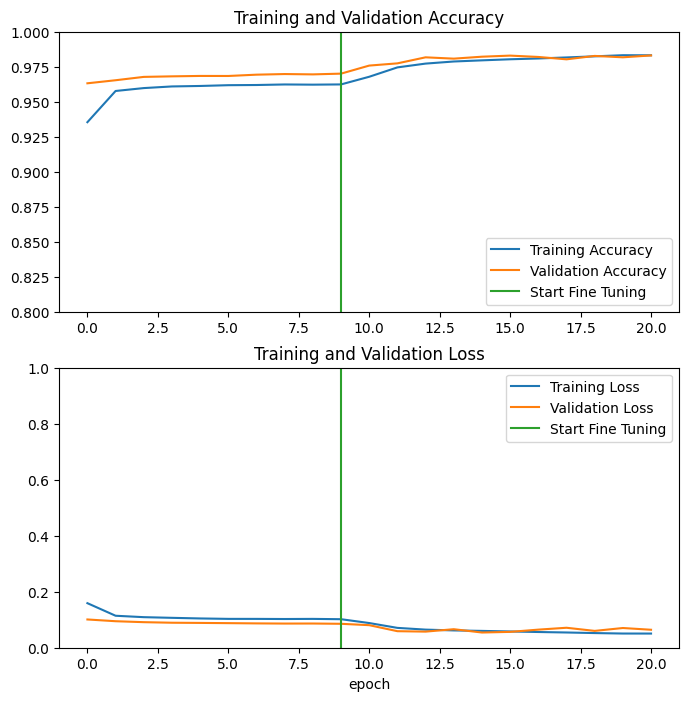

In [17]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([9,9],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([9,9],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

**Predicting On A Batch of Test Images**

In [78]:
import matplotlib.pyplot as plt

In [114]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()


In [115]:
predictions = model.predict_on_batch(image_batch).flatten()
predictions

array([  0.7473968 ,  -7.847964  ,   1.3823293 ,   5.9351087 ,
        -5.9281325 ,   5.4313035 ,  -0.94256747,   4.441245  ,
       -10.218346  ,  -0.690048  ,  -7.830774  ,  11.142329  ,
        10.982974  ,  -2.9264424 ,  18.499743  , -21.564081  ,
         2.914586  ,  -4.444138  , -13.714509  ,   9.181592  ,
        -1.7405783 , -25.000399  ,  -8.720209  ,  -8.088543  ,
         5.8369975 , -11.041775  ,  -4.314182  ,  -4.8182797 ,
        12.236422  ,  -8.124525  ,   5.853679  , -17.972178  ],
      dtype=float32)

In [105]:
# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([9.9931639e-01, 2.0670649e-04, 9.9983597e-01, 3.3531302e-01,
       1.4180149e-05, 9.9999154e-01, 3.9716013e-04, 1.1119533e-02,
       2.5352111e-07, 6.9979062e-05, 9.9944425e-01, 8.2751982e-02,
       9.9999988e-01, 3.8238971e-03, 2.1033184e-05, 1.4199287e-08,
       4.4613725e-07, 6.8154758e-01, 9.9992365e-01, 1.6018108e-05,
       9.9997395e-01, 9.9999130e-01, 1.5234417e-09, 5.6108640e-15,
       8.5119872e-08, 9.9999994e-01, 9.3866068e-01, 1.3077578e-03,
       8.6775827e-01, 9.4856280e-01, 9.9999875e-01, 1.3149538e-08],
      dtype=float32)>

In [106]:
#make predictions either 0 or 1
predictions = tf.where(predictions < 0.5, 0, 1)
predictions

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int32)>

In [109]:
print('Predictions:\n', predictions.numpy().flatten())
print("\nvs\n")
print('Labels:\n', label_batch.flatten() )


Predictions:
 [1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0]

vs

Labels:
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0.]


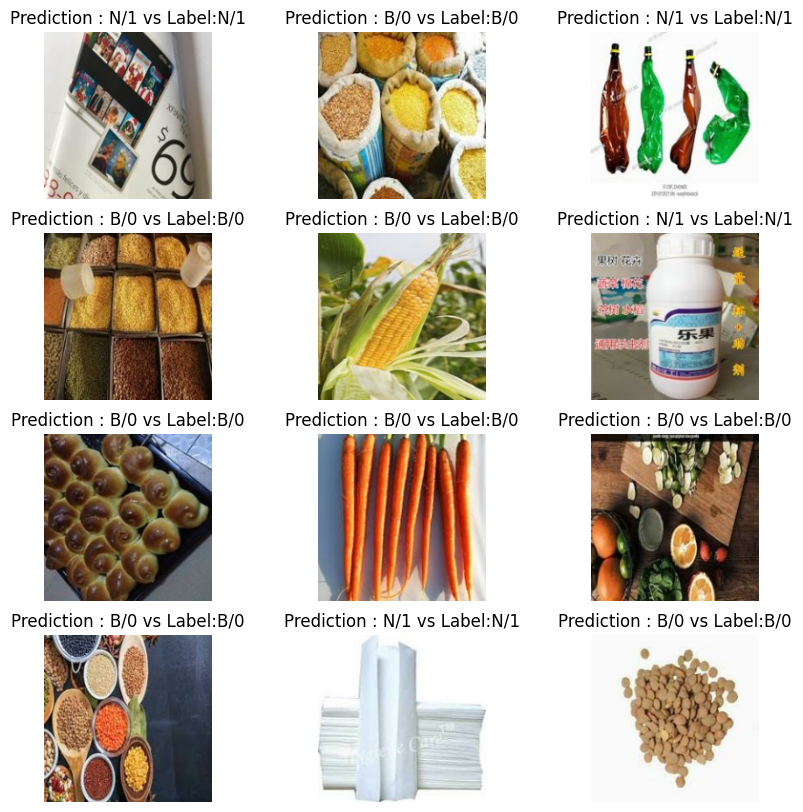

In [110]:
class_names = ['B','N']
plt.figure(figsize=(10, 10))
for i in range(12):
  ax = plt.subplot(4, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(f"Prediction : {class_names[predictions[i]]}/{predictions.numpy()[i]} vs Label:{class_names[int(label_batch.flatten()[i])]}/{int(label_batch.flatten()[i])}")
  plt.axis("off")

**Confusion Matrix**

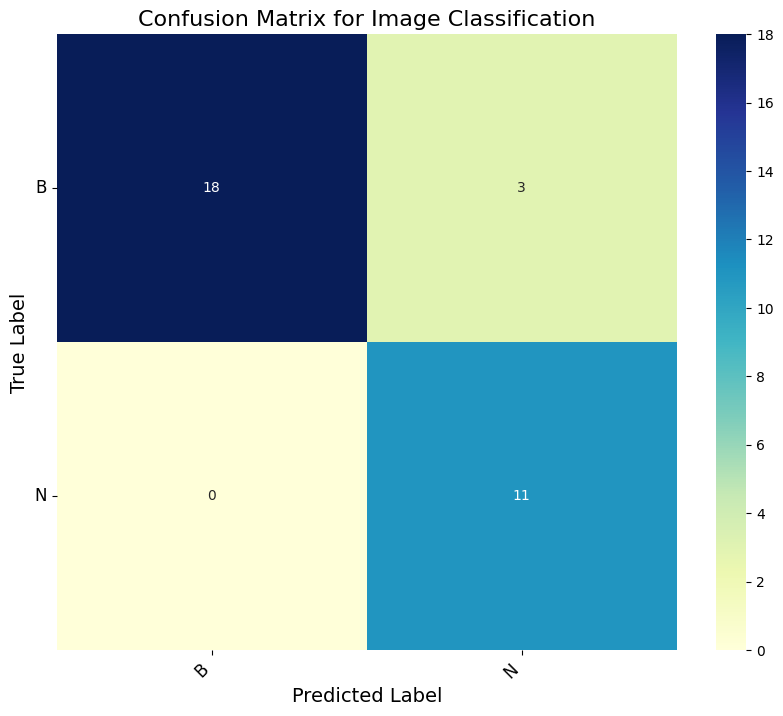

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_true = label_batch.flatten() # True labels of the images
y_pred = predictions.numpy().flatten()   # Predicted labels by the model

# Get the class labels
classes = ['B', 'N',]  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(cm_df, annot=True, fmt="d", cmap='YlGnBu')

# Customizations
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix for Image Classification', fontsize=16)

plt.show()

**Predicting On All Images**

In [165]:
#Check toto batches in train dataset
total_batches = len(test_dataset)
print("Total number of batches in the dataset:", total_batches)

Total number of batches in the dataset: 523


In [188]:
predictions = []  # List to store predictions
labels = [] #list to store labels


total_batches = 523 # Number of batches to use
batch_count = 0  # Counter for number of batches processed

for image_batch, label_batch in test_dataset:
    batch_predictions = model.predict_on_batch(image_batch).flatten()
    predictions.extend(batch_predictions)
    labels.extend(label_batch.numpy().flatten())

    batch_count += 1
    if batch_count == total_batches:
        break

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)

#make predictions either 0 or 1
predictions = tf.where(predictions < 0.5, 0, 1)

#make it array
predictions = np.array(predictions)
labels = np.array(labels)



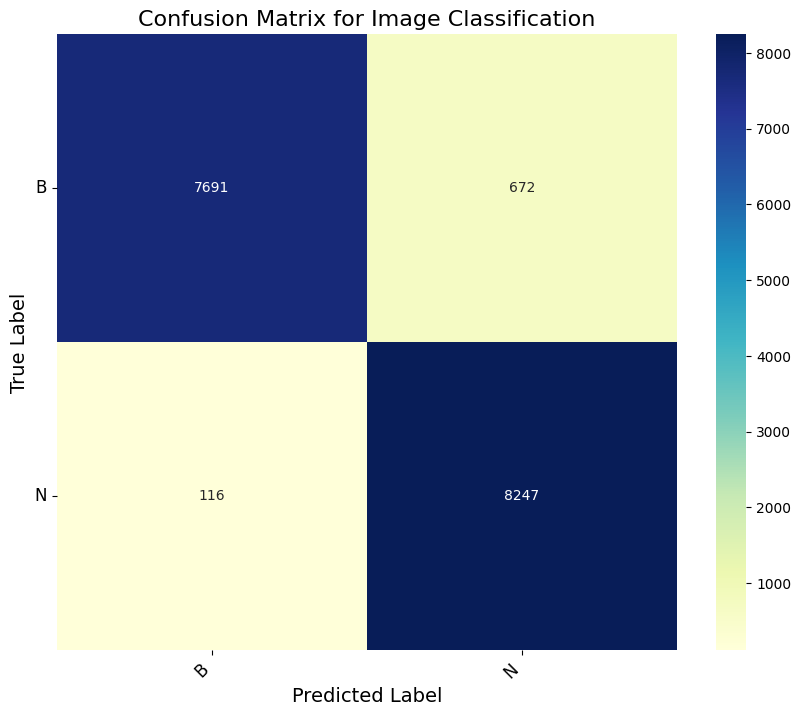

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_true = labels # True labels of the images
y_pred = predictions   # Predicted labels by the model

# Get the class labels
classes = ['B', 'N',]  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(cm_df, annot=True, fmt="d", cmap='YlGnBu')

# Customizations
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix for Image Classification', fontsize=16)

plt.show()

In [190]:
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(labels, predictions))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      8363
         1.0       0.92      0.99      0.95      8363

    accuracy                           0.95     16726
   macro avg       0.95      0.95      0.95     16726
weighted avg       0.95      0.95      0.95     16726



**Predicting New Single Image**

In [47]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

Saving kaleng.jpg to kaleng.jpg
1/1 [==============================] - 1s 867ms/step


Text(0.5, 1.0, 'Prediction : N ')

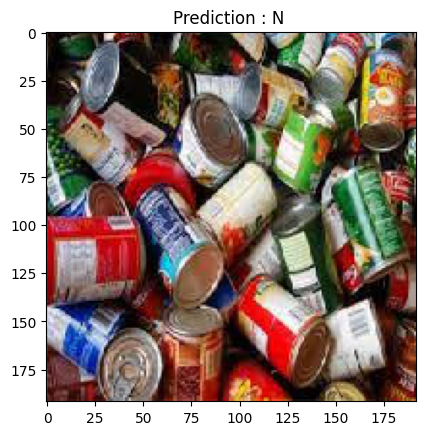

In [49]:
path=""
class_names = os.listdir('/content/Non and biodegradable dataset/TRAIN')

uploaded = files.upload()
for fn in uploaded.keys() :
  path = '' + fn

img = tf.keras.utils.load_img(path,
                              target_size=(192, 192))
img_array = tf.keras.utils.img_to_array(img)
img_array = img_array.astype('uint8')  # Convert to unsigned integer type
predictions = model.predict(tf.expand_dims(img_array, 0))
score = tf.nn.sigmoid(predictions[0])   # Apply a sigmoid since our model returns logits
score = tf.where(score < 0.5, 0, 1)
score = score.numpy()

plt.imshow(img_array)
plt.title(f"Prediction : {class_names[int(score)]} ")


Saving Limbah-Kulit-Pisang-Sumber-Energi-di-Masa-Depan.jpg to Limbah-Kulit-Pisang-Sumber-Energi-di-Masa-Depan.jpg
1/1 [==============================] - 0s 53ms/step


Text(0.5, 1.0, 'Prediction : B ')

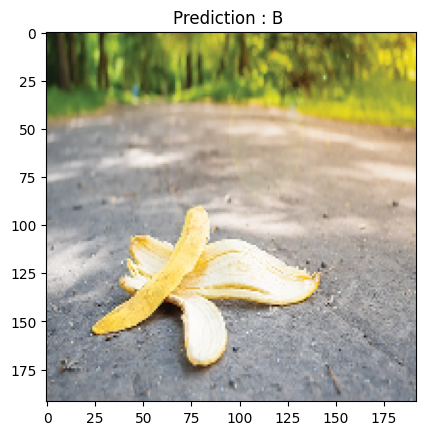

In [50]:
path=""
class_names = os.listdir('/content/Non and biodegradable dataset/TRAIN')

uploaded = files.upload()
for fn in uploaded.keys() :
  path = '' + fn

img = tf.keras.utils.load_img(path,
                              target_size=(192, 192))
img_array = tf.keras.utils.img_to_array(img)
img_array = img_array.astype('uint8')  # Convert to unsigned integer type
predictions = model.predict(tf.expand_dims(img_array, 0))
score = tf.nn.sigmoid(predictions[0])   # Apply a sigmoid since our model returns logits
score = tf.where(score < 0.5, 0, 1)
score = score.numpy()

plt.imshow(img_array)
plt.title(f"Prediction : {class_names[int(score)]} ")
